In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

/home/noname/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Dataset

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
```

The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
df = pd.read_csv("laptops.csv")

--2024-10-10 17:39:38--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291,58K   867KB/s    in 0,3s    

2024-10-10 17:39:38 (867 KB/s) - ‘laptops.csv’ saved [298573/298573]



### Preparing the dataset 

First, we'll normalize the names of the columns:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`


In [3]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df_final = df[['ram', 'storage', 'screen', 'final_price']]
df_final.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### EDA

* Look at the `final_price` variable. Does it have a long tail? 


<Axes: >

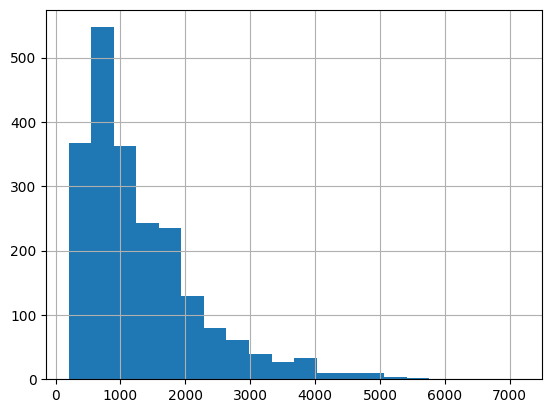

In [20]:
df_final['final_price'].hist(bins=20)

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'` ✅
* `'final_price'`


In [22]:
df_final.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16 ✅
- 24
- 32


In [23]:
df_final.ram.median()

16.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.


In [30]:
X_sub_random = df_final.sample(frac=1.0, random_state=42)

In [31]:
y_sub_random = X_sub_random['final_price']
X_sub_random = X_sub_random.drop(columns='final_price')

In [32]:
n = len(X_sub_random)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

n, n_val + n_train + n_test

(2160, 2160)

In [33]:
X_train = X_sub_random[:n_train]
y_train = y_sub_random[:n_train]

X_val_sub_ran = X_sub_random[n_train:n_train + n_val]
y_val = y_sub_random[n_train:n_train + n_val]

X_test_sub_ran = X_sub_random[n_train + n_val:]
y_test = y_sub_random[n_train + n_val:]

In [34]:
X_test_sub_ran

,ram,storage,screen
1925,32,1000,15.6
612,16,512,13.0
443,16,512,15.6
1002,16,512,15.0
1077,16,1000,15.6
...,...,...,...
1638,8,512,15.0
1095,8,256,15.6
1130,8,256,13.3
1294,8,512,14.0


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean ✅
- Both are equally good

In [57]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [58]:
def rmse(y, y_pred, decimals=2):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.round(np.sqrt(mse), decimals)

##### Option 1. Fill with zeros

In [59]:
w0_zero, w_zero = train_linear_regression(X_train.fillna(0), y_train)
w0_zero, w_zero

(676.8954853003995, array([ 43.70681555,   0.86506867, -36.10399833]))

In [60]:
y_pred_zero = w0_zero + X_train.dot(w_zero)
y_pred_zero 

2079    2377.359877
668      398.020766
2073    2435.126274
1113    1338.936514
788     2362.918277
           ...     
1777     742.551612
183     2362.918277
137     1255.897318
899     1313.663715
796     1313.663715
Length: 1296, dtype: float64

In [61]:
rmse(y_train, y_pred_zero)

602.69

##### Option 2. Fill with mean

In [62]:
w0_mean, w_mean = train_linear_regression(X_train.fillna(X_train.screen.mean()), y_train)
w0_mean, w_mean

(808.9159907334033, array([ 43.90774584,   0.87135236, -45.18273312]))

In [63]:
y_pred_mean = w0_mean + X_train.dot(w_mean)
y_pred_mean 

2079    2380.465582
668      403.236988
2073    2452.757955
1113    1356.641983
788     2362.392489
           ...     
1777     750.685898
183     2362.392489
137     1252.721697
899     1325.014070
796     1325.014070
Length: 1296, dtype: float64

In [64]:
rmse(y_train, y_pred_mean)

602.6

<Axes: ylabel='Count'>

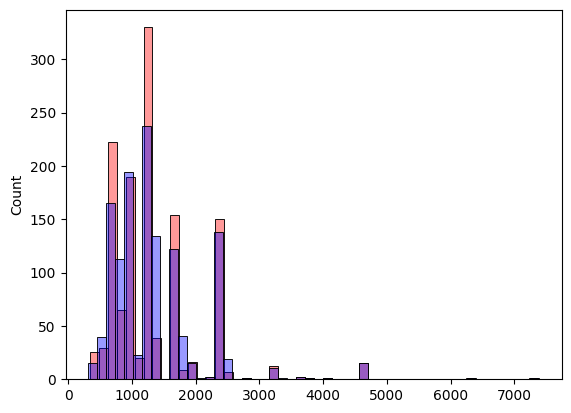

In [65]:
sns.histplot(y_pred_zero, color='red', alpha=0.4, bins=50)
sns.histplot(y_pred_mean, color='blue', alpha=0.4, bins=50)

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:


- 0
- 0.01
- 1
- 10
- 100 ✅

In [66]:
def train_linear_regression_reg(X, y, reg=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + reg * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [67]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0_zero_reg, w_zero_reg = train_linear_regression_reg(X_train.fillna(0), y_train, reg=r)
    y_pred_reg_val = w0_zero_reg + X_val_sub_ran.dot(w_zero_reg)
    rsme_val_reg = rmse(y_val, y_pred_reg_val)
    print("For a reg of {} the rsme score el validation is {}".format(r, rsme_val_reg))

    

For a reg of 0 the rsme score el validation is 596.96
For a reg of 0.01 the rsme score el validation is 596.96
For a reg of 0.1 the rsme score el validation is 596.93
For a reg of 1 the rsme score el validation is 596.63
For a reg of 5 the rsme score el validation is 595.87
For a reg of 10 the rsme score el validation is 595.46
For a reg of 100 the rsme score el validation is 594.89


### Question 5 


* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)




What's the value of std?

- 19.176
- 29.176 ✅
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [77]:
rmses = []

for seed in range(10):
    df_sub_random = df_final.sample(frac=1.0, random_state=seed)

    y_sub_random = df_sub_random['final_price']
    X_sub_random = df_sub_random.drop(columns='final_price')

    X_train = X_sub_random[:n_train]
    y_train = y_sub_random[:n_train]

    X_val_sub_ran = X_sub_random[n_train:n_train + n_val]
    y_val = y_sub_random[n_train:n_train + n_val]

    X_test_sub_ran = X_sub_random[n_train + n_val:]
    y_test = y_sub_random[n_train + n_val:]


    w0_zero, w_zero = train_linear_regression(X_train.fillna(0), y_train)
    y_pred_val = w0_zero + X_val_sub_ran.dot(w_zero)
    rmses.append(rmse(y_val, y_pred_val, decimals=10))

print("The standard deviation of RMSEs is {}".format(round(np.std(rmses), 3)))
    
    

The standard deviation of RMSEs is 29.226


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?


Options:

- 598.60
- 608.60 ✅
- 618.60
- 628.60

In [78]:

df_sub_random = df_final.sample(frac=1.0, random_state=9)

y_sub_random = df_sub_random['final_price']
X_sub_random = df_sub_random.drop(columns='final_price')

# combine the train + val
X_train = X_sub_random[:n_train + n_val]
y_train = y_sub_random[:n_train + n_val]

X_test_sub_ran = X_sub_random[n_train + n_val:]
y_test = y_sub_random[n_train + n_val:]


w0_zero, w_zero = train_linear_regression_reg(X_train.fillna(0), y_train, reg=0.001)
y_pred_test = w0_zero + X_test_sub_ran.dot(w_zero)

print("The RMSE on test dataset is {}".format(rmse(y_test, y_pred_test, decimals=2)))
    
    

The RMSE on test dataset is 608.3
